### ESMA 3016
### Edgar Acuna
### Lab14: Distribuciones ContinuasL Uniforme y Exponencial
### I- Distribucion Uniforme y su aplicacion a simulacion.

$$f(x)=\frac{1}{b-a},$$

para $a<x<b$

In [116]:
from scipy.stats  import uniform,expon,binom
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [117]:
#El valor de la funcion de densidad uniforme (0,1) en el punto .1
uniform.pdf(.1) 

1.0

In [118]:
#La probabilidad acumulada de la Uniforme (0,1) hasta .1
uniform.cdf(.1)

0.10000000000000001

In [119]:
#La probabilidad de una Uniforme entre .4 y .5 es
uniform.cdf(.5)-uniform.cdf(.4)

0.099999999999999978

(array([ 1.03013707,  1.01513507,  1.0251364 ,  0.98313082,  1.02913694,
         1.00513374,  1.01513507,  0.98013042,  0.92012243,  0.99813281]),
 array([  2.26271624e-05,   1.00009321e-01,   1.99996015e-01,
          2.99982709e-01,   3.99969403e-01,   4.99956097e-01,
          5.99942791e-01,   6.99929485e-01,   7.99916179e-01,
          8.99902873e-01,   9.99889567e-01]),
 <a list of 10 Patch objects>)

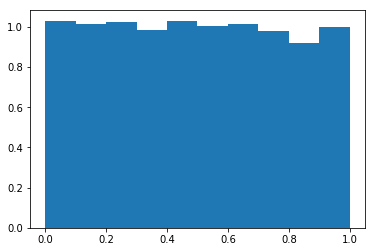

In [120]:
#Simulando 10,000 uniformes (0,1) y haciendo su histograma
plt.hist(uniform.rvs(0,1,10000),normed=True)

In [121]:
#Distribucion Uniforme en un intervalo (a,b)=(2,10)
#Hay que usar los parametros loc=a y scale=b-a
#Hallando la funcion de densidad de la uniforme U(2,10) en el punto x=2.5
uniform.pdf(2.5,loc=2,scale=8)

0.125

In [122]:
#Hallando la probabilidad acumulada de la U(2,10) hasta el valor x=6. O sea P(X<6)
uniform.cdf(6,loc=2,scale=8)

0.5

In [123]:
#Hallando el percentil correspondiente a una probabilidad de .9
uniform.ppf(.9,loc=2,scale=8)

9.1999999999999993

In [124]:
#**********************************************************
#Generando al azar n valores de una bernoulli con parametro p
#*********************************************************
def bernoulli(p,m):
    x=[0]*m
    for i in range(m):
        if uniform.rvs(0,1,1)<p:
            x[i]=1 
    return x

In [125]:
bernoulli(.3,20)

[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]

In [126]:
#Otra forma
def bernoulli1(p,m):
    b=[uniform.rvs(0,1,1)<p for _ in range(0,m)]
    return [int(x) for x in b]

In [127]:
bernoulli1(.3,20)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1]

In [128]:
#************************************************************
#Generando al azar m valores de una binomial con parametros n y p
#************************************************************
#La suma de n Bernoulli's da una binomial(n,p)
def rbinomial(p,n,m):
    x=[0]*m
    for i in range(m): 
        y=0
        for j in range(n):
            y+=sum(bernoulli(p,1))
        x[i]=y    
    return x

In [129]:
import time
start_time = time.time()
rbinomial(.5,6,10000)
print("--- %s seconds ---" % (time.time() - start_time))
rbinomial(.5,6,20)

--- 1.85300016403 seconds ---


[3, 3, 3, 2, 3, 6, 3, 2, 2, 3, 4, 2, 3, 3, 2, 3, 2, 1, 2, 4]

In [130]:
#Otra forma
def rbinom1(p,n,m):
    b=[bernoulli1(p,n) for _ in range(0,m)]
    return np.sum(b,axis=1)

In [131]:
start_time = time.time()
rbinom1(.5,6,10000)
print("--- %s seconds ---" % (time.time() - start_time))
rbinom1(.5,6,20)

--- 1.78500008583 seconds ---


array([0, 2, 5, 4, 3, 5, 2, 4, 2, 4, 1, 2, 2, 4, 3, 4, 4, 4, 3, 3])

In [132]:
start_time = time.time()
binom.rvs(6,.5,size=10000)
print("--- %s seconds ---" % (time.time() - start_time))
binom.rvs(6,.5,size=20)

--- 0.000999927520752 seconds ---


array([1, 1, 1, 3, 2, 1, 3, 1, 4, 2, 2, 3, 3, 5, 1, 2, 1, 5, 3, 2])

### Distribucion exponencial
$$f(x)=\frac{1}{\theta}e^{-\frac{x}{\theta}},$$

para $x>0$, tambien $\theta>0$

In [133]:
#***************************************************************************
#simulando una muestra de 200 tiempos de espera en un banco
#se esta considerando que el tiempo de espera promedio es 10 minutos
#los tiempos estan dados en minutos
#******************************************************************************* 
tiempos=expon.rvs(scale=10,size=200)

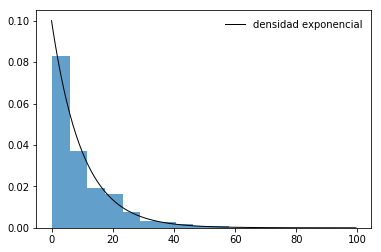

In [134]:
#Generando un histograma de los datos pero de tal manera que el area total sea 1
x=np.arange(0,100,.5)
#Haciendo una comparacion grafica
fig, ax = plt.subplots(1, 1)
ax.hist(tiempos, normed = True,alpha=.7)
ax.plot(x, expon.pdf(x,scale=10), 'k-', lw=1, label='densidad exponencial')
ax.legend(loc='best', frameon=False)

Cual es la probabilidad de que se tenga que esperar mas de 15 minutos para ser atendido?
Area bajo la curva mas alla de 15

$$P(x>15)=\int_{15}^{\infty}\frac{1}{10}e^{-\frac{x}{10}}dx$$

In [135]:
#Calculando aproximadamente la integral
def integrando(x):
    return np.exp(-x/10)/10
quad(integrando,15,np.Inf)

(0.22313016014842987, 2.2730397098404664e-10)

#### El primer valor es el resultado de la integral y el segundo es el error del resultado

In [136]:
#Haciendolo por complemento=1-area hasta 15 y usando la densidad exponencial
1-expon.cdf(15,scale=10)

0.22313016014842979

In [137]:
#Estimando la probabilidad
probest=len(tiempos[tiempos>15])/float(200)
probest

0.23